In [34]:
from math import pi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from matplotlib.backends.backend_pdf import PdfPages


In [35]:

def convert_to_minutes(time_str):
    try:
        if isinstance(time_str, str) and ':' in time_str:
            minutes, seconds = map(int, time_str.split(':'))
            return minutes + seconds / 60
        else:
            minutes = int(time_str)
            return minutes
    except ValueError as e:
        print(f"Error converting time string '{time_str}': {e}")
        return None  # Handle missing or malformed data

file_path = './pettersson-2023-24.csv'
columns = ['Player', 'Game Date', 'Team', 'S/C', 'Pos', 'GP', 'G', 'A', 'P', '+/-', 'PIM', 'P/GP', 'EVG', 'EVP', 'PPG', 'PPP', 'SHG', 'SHP', 'OTG', 'GWG', 'S', 'S%', 'TOI/GP', 'FOW%']
data = pd.read_csv(file_path, usecols=columns)

data.replace('--', np.nan, inplace=True)


data['Game Date'] = pd.to_datetime(data['Game Date'])

data['TOI/GP'] = data['TOI/GP'].apply(convert_to_minutes)
if data['TOI/GP'].isna().any():
    nan_rows = data[data['TOI/GP'].isna()]
    for index, row in nan_rows.iterrows():
        print(f"Error: NaN value found at row {index + 1} on date {row['Game Date']}")


# Convert 'Game Date' to a numerical index
data['Game Date Numeric'] = (data['Game Date'] - data['Game Date'].min()).dt.days

data['Game Number'] = range(1, len(data) + 1)

numeric_columns = ['G', 'A', 'P', '+/-', 'PIM', 'EVG', 'EVP', 'PPG', 'PPP', 'SHG', 'SHP', 'OTG', 'GWG', 'S', 'S%', 'FOW%']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [36]:

categories = list(data.columns)
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

#  split data into before and after February 3, 2024
before_data = data[data['Game Date'] < '2024-02-03']
after_data = data[data['Game Date'] >= '2024-02-03']

In [37]:
after_data

,Player,Game Date,Team,S/C,Pos,GP,G,A,P,+/-,...,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%,Game Date Numeric,Game Number
6,Elias Pettersson,2024-03-19,VAN,L,C,1,2,1,3,1,...,0,0,0,1,4,50.0,22.116667,57.0,160,7
8,Elias Pettersson,2024-02-10,VAN,L,C,1,1,2,3,1,...,0,0,0,0,1,100.0,19.383333,53.0,122,9
11,Elias Pettersson,2024-02-15,VAN,L,C,1,0,3,3,3,...,0,0,0,0,1,0.0,18.850000,60.0,127,12
14,Elias Pettersson,2024-03-09,VAN,L,C,1,1,1,2,2,...,0,0,0,0,2,50.0,16.050000,50.0,150,15
21,Elias Pettersson,2024-03-23,VAN,L,C,1,0,2,2,3,...,0,0,0,0,1,0.0,19.733333,50.0,164,22
27,Elias Pettersson,2024-03-05,VAN,L,C,1,1,0,1,2,...,0,0,0,0,4,25.0,21.850000,68.0,146,28
29,Elias Pettersson,2024-04-10,VAN,L,C,1,1,0,1,1,...,0,0,0,0,2,50.0,20.150000,75.0,182,30
30,Elias Pettersson,2024-02-19,VAN,L,C,1,1,0,1,-1,...,0,0,0,0,4,25.0,19.233333,33.0,131,31
34,Elias Pettersson,2024-03-07,VAN,L,C,1,0,1,1,1,...,0,0,0,0,3,0.0,19.633333,53.0,148,35
36,Elias Pettersson,2024-02-24,VAN,L,C,1,0,1,1,1,...,0,0,0,0,2,0.0,18.983333,61.0,136,37


In [38]:

# Filter data before and after Feb 3, 2024
before_feb_3 = before_data
after_feb_3 = after_data

In [39]:

# Calculate averages for before and after Feb 3, 2024
avg_goals_before = before_feb_3['G'].mean()
avg_assists_before = before_feb_3['A'].mean()

avg_goals_after = after_feb_3['G'].mean()
avg_assists_after = after_feb_3['A'].mean()

In [40]:
avg_goals_before

0.5510204081632653

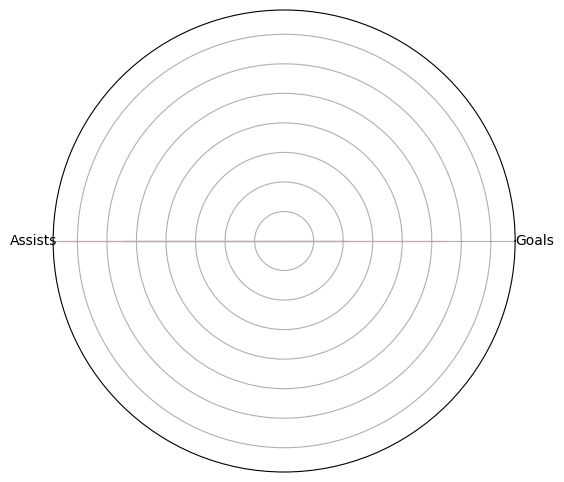

In [41]:

# Plot radar chart
labels = ['Goals', 'Assists']
stats_before = [avg_goals_before, avg_assists_before]
stats_after = [avg_goals_after, avg_assists_after]

# Number of variables we're plotting
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
stats_before += stats_before[:1]
stats_after += stats_after[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.fill(angles, stats_before, color='red', alpha=0.25)
ax.fill(angles, stats_after, color='blue', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.show()

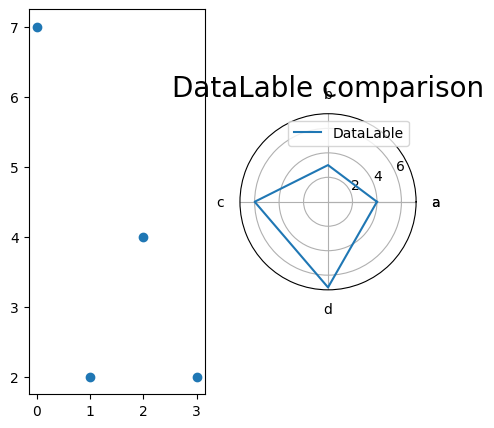

In [42]:
import numpy as np
import matplotlib.pyplot as plt


## Plot 1
x1 = np.array([0, 1, 2, 3])
y1 = np.array([7, 2, 4, 2])

plt.figure(figsize= (5, 5))

plt.subplot(1, 2, 1)

plt.scatter(x1, y1)

# plt.show()

### Plot 2
# make up data for plot
polar_list = ['a', 'b', 'c', 'd', 'a']
polar_points = [4, 3, 6, 7, 4]

# modify lists for plots
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(polar_list))
plt.subplot(1, 2, 2, polar=True)

plt.plot(label_loc, polar_points, label='DataLable')

plt.title('DataLable comparison', size=20, y=1.05)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=polar_list)

plt.legend()
plt.show()

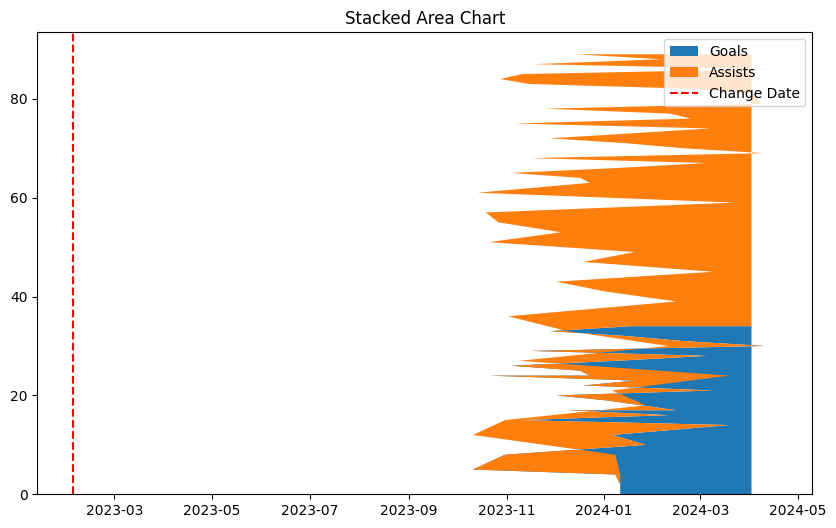

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
data['CumulativePoints'] = data['G'].cumsum()
data['CumulativeShots'] = data['A'].cumsum()

change_date = '2023-02-03'

ax.stackplot(data['Game Date'], data['CumulativePoints'], data['CumulativeShots'], labels=['Goals', 'Assists'])
ax.axvline(pd.to_datetime(change_date), color='r', linestyle='--', label='Change Date')

ax.set_title('Stacked Area Chart')
ax.legend()
plt.show()


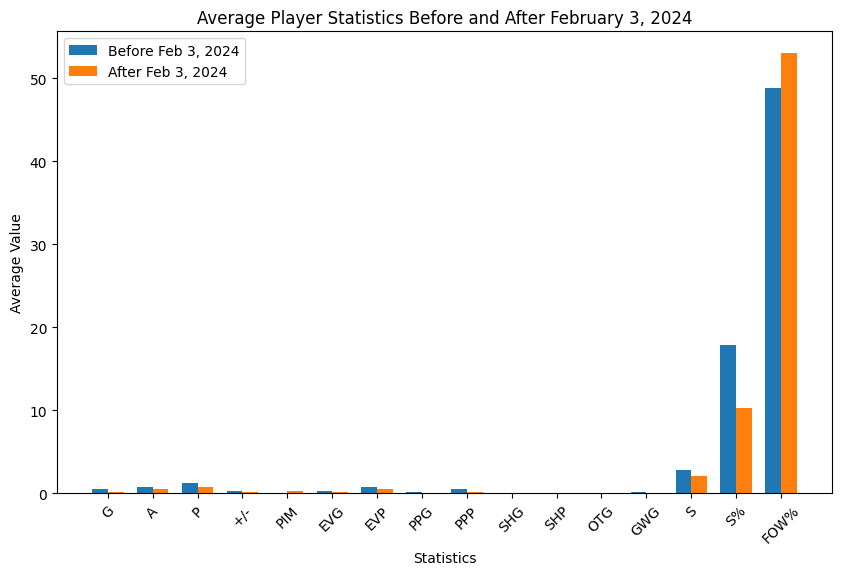

In [44]:
columns_to_plot = ['G', 'A', 'P', '+/-', 'PIM', 'EVG', 'EVP', 'PPG', 'PPP', 'SHG', 'SHP', 'OTG', 'GWG', 'S', 'S%', 'FOW%']

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(columns_to_plot))

before_means = before_feb_3[columns_to_plot].mean()
after_means = after_feb_3[columns_to_plot].mean()

before_bar = ax.bar(index, before_means, bar_width, label='Before Feb 3, 2024')
after_bar = ax.bar(index + bar_width, after_means, bar_width, label='After Feb 3, 2024')

ax.set_xlabel('Statistics')
ax.set_ylabel('Average Value')
ax.set_title('Average Player Statistics Before and After February 3, 2024')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(columns_to_plot, rotation=45)
ax.legend()

plt.show()

/var/folders/5c/3sb9ny210gq9942425f138yw0000gn/T/ipykernel_5190/4171943916.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, before_percentages[i] + 1, f'{value:.2f}', ha='center', va='bottom')
/var/folders/5c/3sb9ny210gq9942425f138yw0000gn/T/ipykernel_5190/4171943916.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i + bar_width, after_percentages[i] + 1, f'{value:.2f}', ha='center', va='bottom')


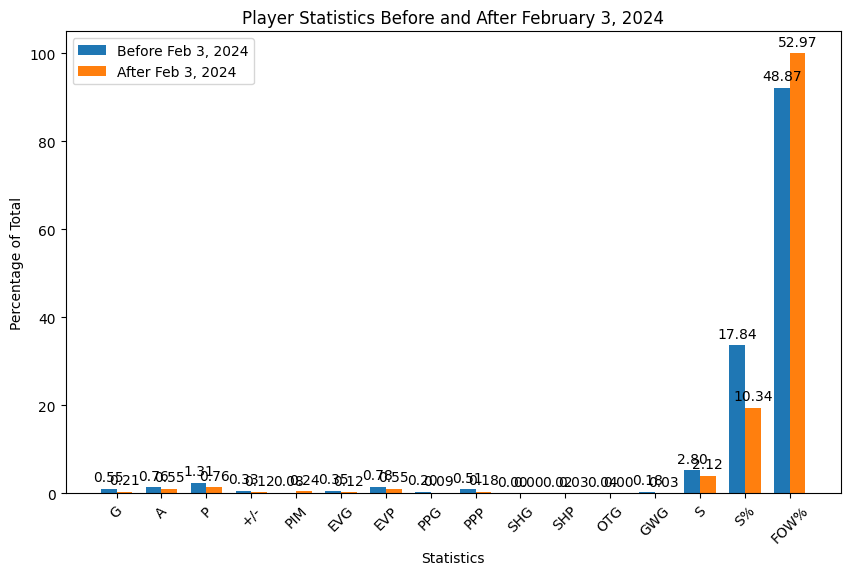

In [45]:

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(columns_to_plot))

before_means = before_feb_3[columns_to_plot].mean()
after_means = after_feb_3[columns_to_plot].mean()

# find the max for each stat before and after, then the % for each is the % of that max over both
before_max = before_means.max()
after_max = after_means.max()

maxes = pd.concat([before_means, after_means]).max()

before_percentages = before_means / maxes * 100
after_percentages = after_means / maxes * 100

before_bar = ax.bar(index, before_percentages, bar_width, label='Before Feb 3, 2024')
after_bar = ax.bar(index + bar_width, after_percentages, bar_width, label='After Feb 3, 2024')

ax.set_xlabel('Statistics')
ax.set_ylabel('Percentage of Total')
ax.set_title('Player Statistics Before and After February 3, 2024')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(columns_to_plot, rotation=45)

# Display the actual values on top of the bars
for i, value in enumerate(before_means):
    ax.text(i, before_percentages[i] + 1, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(after_means):
    ax.text(i + bar_width, after_percentages[i] + 1, f'{value:.2f}', ha='center', va='bottom')

ax.legend()

plt.show()


In [46]:

before_means = before_feb_3[columns_to_plot].mean()
after_means = after_feb_3[columns_to_plot].mean()

# find the max for each stat before and after, then the % for each is the % of that max over both
before_max = before_means.max()
after_max = after_means.max()

maxes = pd.concat([before_means, after_means]).max()

before_percentages = before_means / maxes * 100
after_percentages = after_means / maxes * 100

In [47]:
before_means.max()


48.87234042553192

In [48]:
maxes = pd.concat([before_means, after_means]).max()

In [49]:
pd.concat([before_means, after_means])

G        0.551020
A        0.755102
P        1.306122
+/-      0.326531
PIM      0.081633
EVG      0.346939
EVP      0.775510
PPG      0.204082
PPP      0.510204
SHG      0.000000
SHP      0.020408
OTG      0.040816
GWG      0.183673
S        2.795918
S%      17.844444
FOW%    48.872340
G        0.212121
A        0.545455
P        0.757576
+/-      0.121212
PIM      0.242424
EVG      0.121212
EVP      0.545455
PPG      0.090909
PPP      0.181818
SHG      0.000000
SHP      0.030303
OTG      0.000000
GWG      0.030303
S        2.121212
S%      10.344828
FOW%    52.969697
dtype: float64

In [50]:
np.maximum(before_means, after_means)

G        0.551020
A        0.755102
P        1.306122
+/-      0.326531
PIM      0.242424
EVG      0.346939
EVP      0.775510
PPG      0.204082
PPP      0.510204
SHG      0.000000
SHP      0.030303
OTG      0.040816
GWG      0.183673
S        2.795918
S%      17.844444
FOW%    52.969697
dtype: float64

/var/folders/5c/3sb9ny210gq9942425f138yw0000gn/T/ipykernel_5190/4177231557.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(i, before_percentages[i] + 1, f'{value:.2f}', ha='center', va='bottom')
/var/folders/5c/3sb9ny210gq9942425f138yw0000gn/T/ipykernel_5190/4177231557.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(i + bar_width, after_percentages[i] + 1, f'{value:.2f}', ha='center', va='bottom')


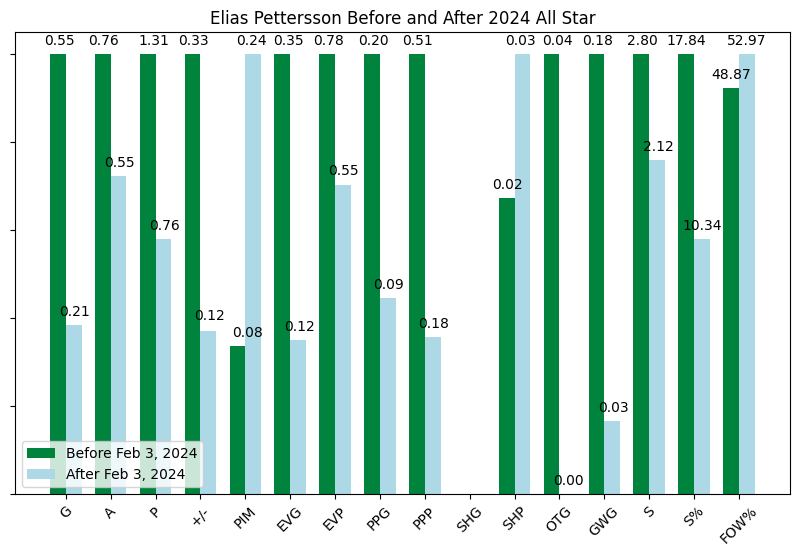

In [51]:
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(columns_to_plot))

# find the max of before and after for each mean stat, so we can calculate the percentage
max_values = np.maximum(before_means, after_means)

before_percentages = before_means / max_values * 100
after_percentages = after_means / max_values * 100



before_bar = ax.bar(index, before_percentages, bar_width, label='Before Feb 3, 2024', color='#00843D')
after_bar = ax.bar(index + bar_width, after_percentages, bar_width, label='After Feb 3, 2024', color='lightblue')

# ax.set_xlabel('Statistics')
# ax.set_ylabel('Percentage of Total')
ax.set_title('Elias Pettersson Before and After 2024 All Star')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(columns_to_plot, rotation=45)

ax.set_yticklabels([])

texts = []

# Display the actual values on top of the bars
for i, value in enumerate(before_means):
    text = ax.text(i, before_percentages[i] + 1, f'{value:.2f}', ha='center', va='bottom')
    texts.append(text)

for i, value in enumerate(after_means):
    text = ax.text(i + bar_width, after_percentages[i] + 1, f'{value:.2f}', ha='center', va='bottom')
    texts.append(text)

adjust_text(texts)

ax.legend(loc='lower left')

plt.show()


The date with the biggest delta is 2024-02-11 00:00:00 with a delta of 2.30 percentage points


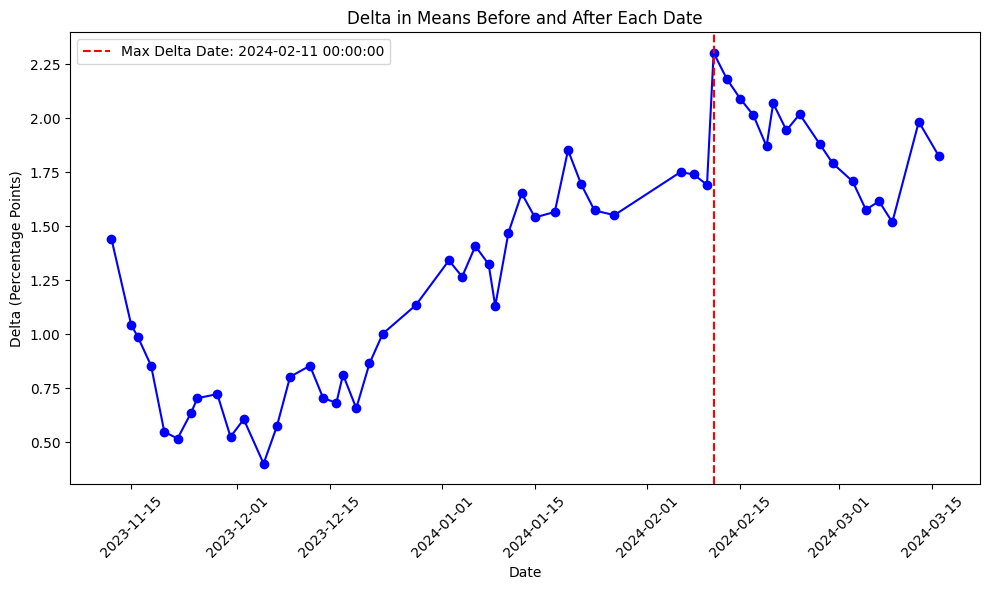

In [54]:

# Define the season's start and end dates
season_start = data['Game Date'].min()
season_end = data['Game Date'].max()

# Define one month period
one_month = pd.DateOffset(months=1)

# Filter out dates within one month of the season's start and end
valid_dates = data['Game Date'][(data['Game Date'] > season_start + one_month) & 
                                (data['Game Date'] < season_end - one_month)].sort_values().unique()

# Initialize list to store deltas
deltas = []

# Iterate over each valid date
for date in valid_dates:
    before_data = data[data['Game Date'] < date]
    after_data = data[data['Game Date'] >= date]
    
    if len(before_data) > 0 and len(after_data) > 0:
        before_means = before_data[columns_to_plot].mean()
        after_means = after_data[columns_to_plot].mean()
        
        maxes = pd.concat([before_means, after_means]).max()
        
        before_percentages = before_means / maxes * 100
        after_percentages = after_means / maxes * 100
        
        delta = np.abs(after_percentages - before_percentages).mean()
        deltas.append((date, delta))

# Sort the deltas by date
deltas = sorted(deltas, key=lambda x: x[0])

# Extract dates and delta values for plotting
delta_dates, delta_values = zip(*deltas)

# Find the date with the maximum delta
max_delta_date, max_delta = max(deltas, key=lambda x: x[1])

# Output the date with the biggest delta
print(f'The date with the biggest delta is {max_delta_date} with a delta of {max_delta:.2f} percentage points')

# Plot the deltas to visualize
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(delta_dates, delta_values, marker='o', linestyle='-', color='b')
ax.set_xlabel('Date')
ax.set_ylabel('Delta (Percentage Points)')
ax.set_title('Delta in Means Before and After Each Date')
ax.axvline(max_delta_date, color='r', linestyle='--', label=f'Max Delta Date: {max_delta_date}')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()